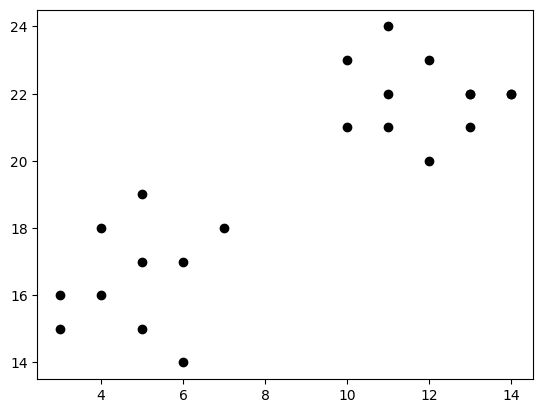

In [1]:
import matplotlib.pyplot as plt

x = [ 5,  4, 13, 11, 13,  5,  3,  4,  3, 10, 12, 13, 14, 12, 11,  6,  7,  6,  5, 11, 14, 10]
y = [15, 18, 22, 21, 21, 19, 15, 16, 16, 21, 23, 22, 22, 20, 22, 17, 18, 14, 17, 24, 22, 23]

plt.scatter(x, y, color='black')
plt.show()

The above example with marks of **22 students** for **2 subjects**.

**The problem is to find groups of excellent and under performing students.**

In [15]:
data=list(zip(x, y))
print(data)
from sklearn.cluster import KMeans
KMeans=KMeans(n_clusters=4, n_init='auto')
KMeans.fit(data)
c=KMeans.labels_ # these are classes or groups or clusters
print(c)

[(5, 15), (4, 18), (13, 22), (11, 21), (13, 21), (5, 19), (3, 15), (4, 16), (3, 16), (10, 21), (12, 23), (13, 22), (14, 22), (12, 20), (11, 22), (6, 17), (7, 18), (6, 14), (5, 17), (11, 24), (14, 22), (10, 23)]
[2 0 1 3 1 0 2 2 2 3 3 1 1 1 3 0 0 2 0 3 1 3]


[]

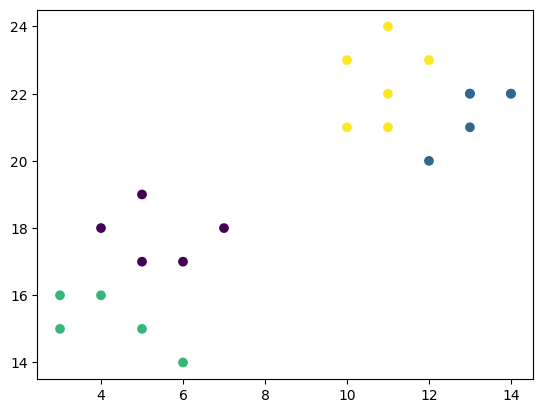

In [16]:
plt.scatter(x,y,c=KMeans.labels_)
plt.plot()

In [17]:
from sklearn import metrics
metrics.silhouette_score(data,c,metric='euclidean')

0.40595784802971724

In [18]:
metrics.calinski_harabasz_score(data, c)

84.75979738736338

In [20]:
from sklearn.cluster import KMeans
inertias=[] #SSE / WCSS
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_) # Append the error to inertias

print(inertias)

[515.8181818181818, 73.01666666666667, 54.6, 34.1, 26.266666666666666, 25.5, 19.0, 13.333333333333336, 10.5, 11.583333333333332]


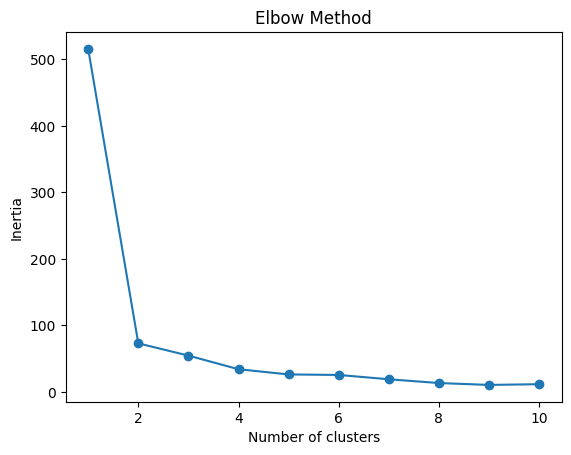

In [21]:
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

**clustering data with higer dimension**

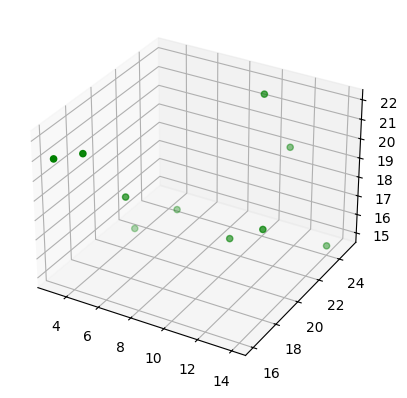

In [22]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
z = [15, 18, 22, 21, 21, 19, 15, 16, 16, 17]

ax = plt.axes(projection ="3d")

ax.scatter3D(x, y, z, color = "green")
plt.show()

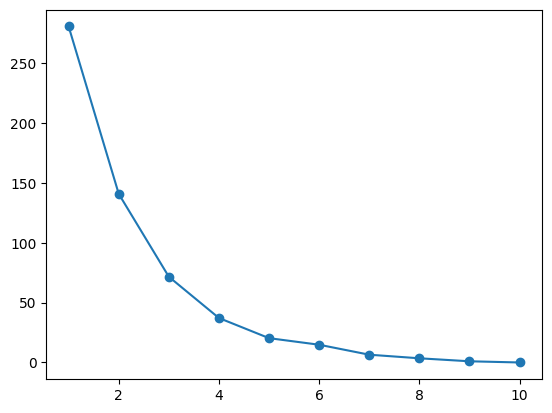

In [26]:
from sklearn.cluster import KMeans
data=list(zip(x,y,z))

inertias=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.show()

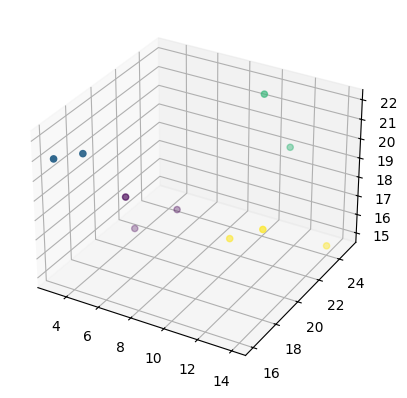

In [29]:
kmeans=KMeans(n_clusters=4, n_init='auto')
kmeans.fit(data)
ax=plt.axes(projection='3d')
ax.scatter3D(x,y,z, c=kmeans.labels_)
plt.show()

In [31]:
import pandas as pd
X=pd.read_csv("housing.csv")
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


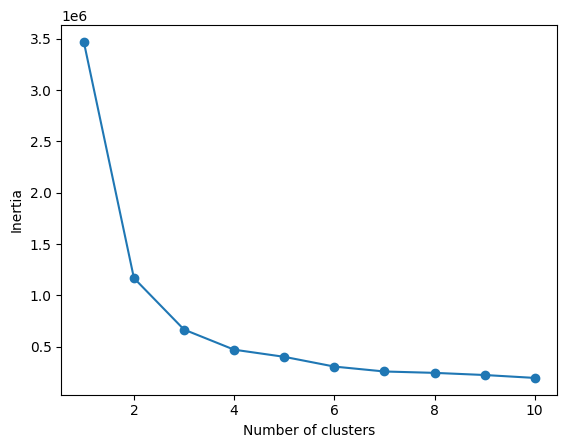

In [32]:
from sklearn.cluster import KMeans
data=list(zip(X.MedInc, X.HouseAge,X.AveRooms))
inertias=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Feature Extraction- Dimensionality Reduction**

In [35]:
from sklearn.decomposition import PCA
X_norm=(X-X.min())/(X.max()-X.min()) ## normalization of values
pca=PCA(n_components=2)

transformed_data=pd.DataFrame(pca.fit_transform(X_norm))

transformed_data

,0,1
0,0.267184,0.648987
1,0.252400,0.282721
2,0.328713,0.585428
3,0.341324,0.536940
4,0.350373,0.503616
...,...,...
20635,0.447789,-0.270524
20636,0.436279,-0.325650
20637,0.429064,-0.328828
20638,0.439350,-0.325415


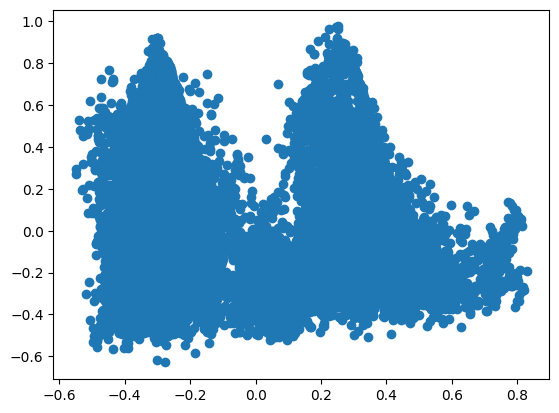

In [36]:
x=transformed_data[0]
y=transformed_data[1]

plt.scatter(x,y)
plt.show()

In [37]:
import pandas as pd
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']

D =pd.read_csv("wine.csv", names=cols)
D.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
unique = pd.unique(D['Class'])
print(unique)
n = len(unique)

print("No.of.unique values :", n)

[1 2 3]
No.of.unique values : 3


In [39]:
Y = D['Class']
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64


In [40]:
X = D.loc[:, D.columns != 'Class']
print(X)

     Alcohol  MalicAcid   Ash  ...   Hue  OD280/OD315  Proline
0      14.23       1.71  2.43  ...  1.04         3.92     1065
1      13.20       1.78  2.14  ...  1.05         3.40     1050
2      13.16       2.36  2.67  ...  1.03         3.17     1185
3      14.37       1.95  2.50  ...  0.86         3.45     1480
4      13.24       2.59  2.87  ...  1.04         2.93      735
..       ...        ...   ...  ...   ...          ...      ...
173    13.71       5.65  2.45  ...  0.64         1.74      740
174    13.40       3.91  2.48  ...  0.70         1.56      750
175    13.27       4.28  2.26  ...  0.59         1.56      835
176    13.17       2.59  2.37  ...  0.60         1.62      840
177    14.13       4.10  2.74  ...  0.61         1.60      560

[178 rows x 13 columns]


In [42]:
from sklearn.decomposition import PCA

X_norm = (X - X.min())/(X.max() - X.min())

pca = PCA(n_components=3) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

transformed.head()

,0,1,2
0,0.706336,0.253193,0.024093
1,0.484977,0.008823,-0.280482
2,0.521172,0.189187,0.196217
3,0.821644,0.580906,0.081110
4,0.202546,0.059467,0.300240


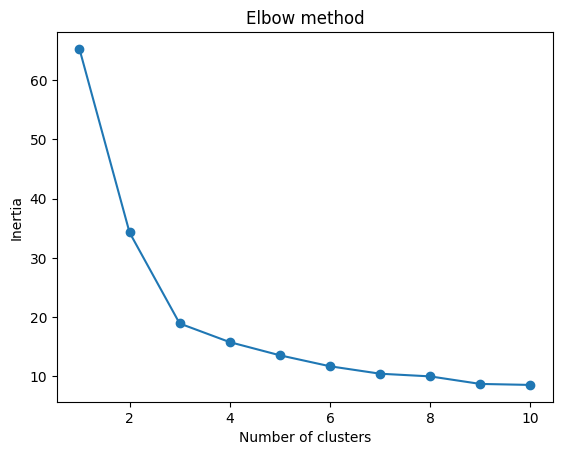

In [45]:
from sklearn.cluster import KMeans

x = transformed[0]
y = transformed[1]
z = transformed[2]

data = list(zip(x, y, z))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
from sklearn.cluster import KMeans

data = list(zip(x, y, z))

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(data)

c=kmeans.labels_
print(c)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


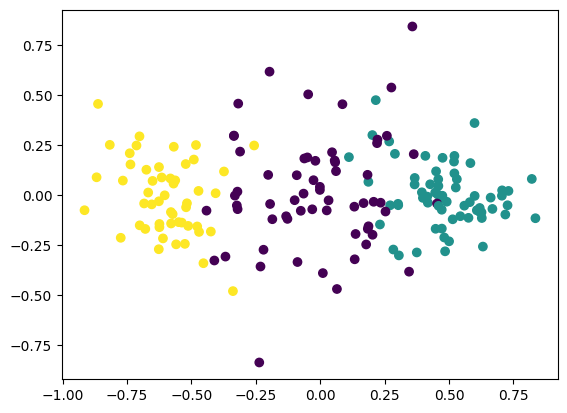

In [47]:
plt.scatter(x, z, c=c)
plt.show()

In [48]:
from sklearn import metrics

labels_true = Y
labels_pred = c

metrics.rand_score(Y, c)

0.9318225099980956

In [49]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.8470966807514034

In [50]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.832908144881443